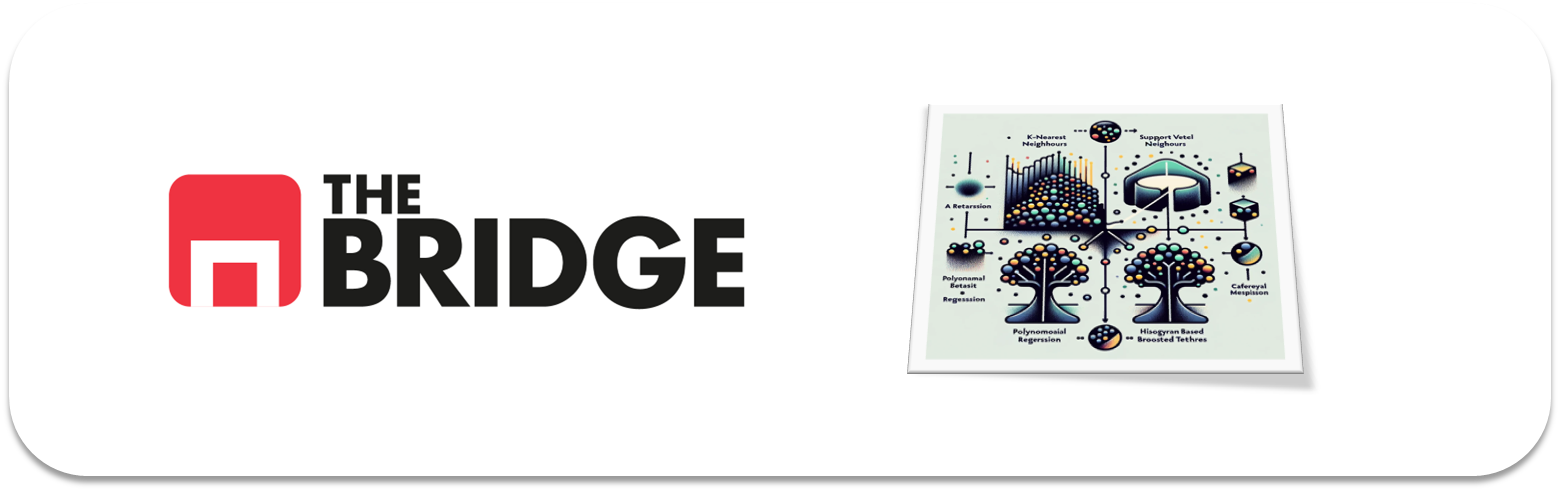

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import toolbox_ML as tb
import bootcampviztools as bt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.options.mode.copy_on_write = True

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

'MonthlyIncome' y 'NumberOfDependents' tiene nulos.

In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [5]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
6        20
7         1
8         2
98       21
Name: count, dtype: int64

In [6]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

NumberOfTime60-89DaysPastDueNotWorse
0     11901
1       492
2        86
3        18
4        14
5         4
11        1
98       21
Name: count, dtype: int64

In [7]:
df["NumberOfTimes90DaysLate"].value_counts().sort_index()

NumberOfTimes90DaysLate
0     11839
1       412
2       147
3        55
4        33
5        14
6         6
7         4
8         3
9         1
10        1
13        1
98       21
Name: count, dtype: int64

El 98 no tiene sentido

In [8]:
tb.describe_df(df)

COL_N,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.75,0.0,0.0,0.0,0.0,1.41
UNIQUE_VALUES,2,10764,78,10,11547,4167,43,13,16,8,10
CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


Considero todas numéricas aunque la cardinalidad de algunas sea baja.

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Notas |
|-----------------------------------|-----------------------------------------------------------------------------|------------------|-------|
| SeriousDlqin2yrs                  | 1 si la persona tiene deudas pendientes de más de dos años, 0 si no.        | Binaria          |       |
| RevolvingUtilizationOfUnsecuredLines | Saldo total de crédito excepto bienes y deudas sin cuotas, dividio por la suma de los límites de crédito | Numérica | En porcentaje |
| age                               | Edad de la persona                                                          | Numérica         |       |
| NumberOfTime30-59DaysPastDueNotWorse | Número de veces que la persona se ha retrasado entre 30 y 59 días en el pago en los dos últimos años | Numérica | |
| DebtRatio                         | Pagos mensuales de deuda                                                    | Numérica         | En porcentaje |
| MonthlyIncome                     | Ingresos mensuales                                                          | Numérica         |       |
| NumberOfOpenCreditLinesAndLoans   | Número de préstamos abiertos y líneas de crédito                            | Numérica         |       |
| NumberOfTimes90DaysLate           | Número de veces que la persona se ha retrasado 90 días o más en el pago     | Numérica         |       |
| NumberRealEstateLoansOrLines      | Número de préstamos hipotecarios e inmobiliarios                            | Numérica         |       |
| NumberOfTime60-89DaysPastDueNotWorse | Número de veces que la persona se ha retrasado entre 60 y 89 días en el pago en los dos últimos años | Numérica | |
| NumberOfDependents                | Número de personas dependientes en la familia, excluyendo a ellos mismos    | Numérica         |       |



### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

La variable target es binaria, por tanto se trata de un problema de clasificación.

In [9]:
target = "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

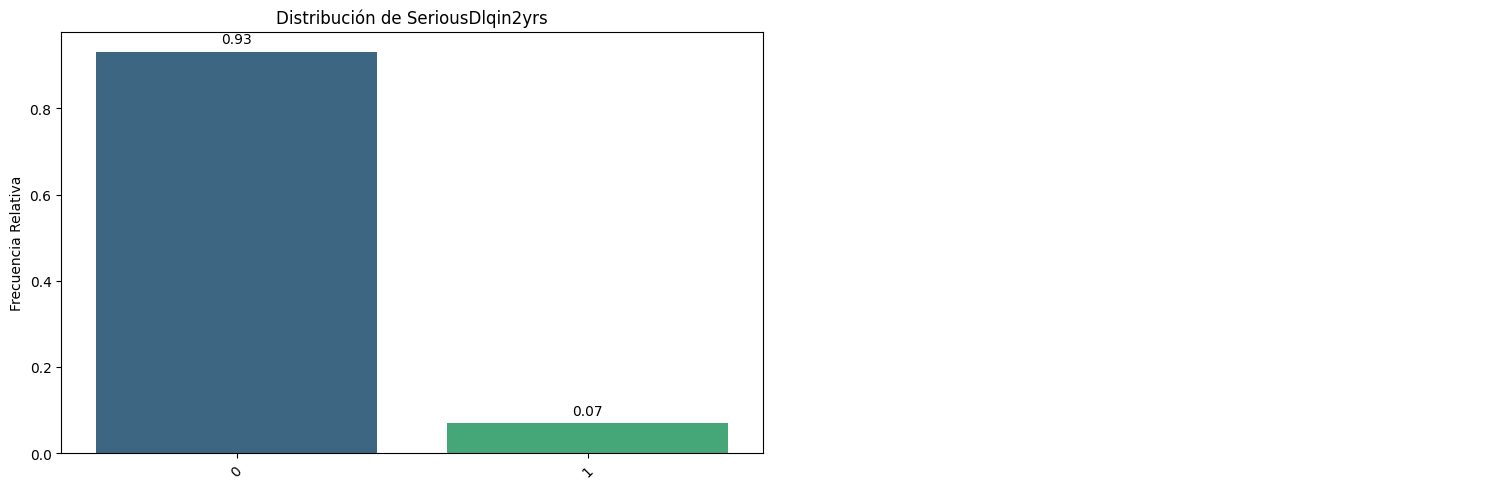

In [10]:
bt.pinta_distribucion_categoricas(df, columnas_categoricas= [target], relativa= True, mostrar_valores= True)

Está muy desbalanceda, son muchos más los que no tienen deudas pendientes de más de dos años.

### #1.4. Split Train y Test

In [11]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

### #1.5. Limpieza de datos

In [12]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [13]:
# Nulos
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="median")

tienen_nulos = ["MonthlyIncome", "NumberOfDependents"]

train_set[tienen_nulos] = imp.fit_transform(train_set[tienen_nulos])
test_set[tienen_nulos] = imp.transform(test_set[tienen_nulos])

In [14]:
train_set[tienen_nulos].isna().sum()

MonthlyIncome         0
NumberOfDependents    0
dtype: int64

In [15]:
test_set[tienen_nulos].isna().sum()

MonthlyIncome         0
NumberOfDependents    0
dtype: int64

### #1.6. Mini-EDA

In [16]:
features_num = [col for col in train_set.columns if col != target]

features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

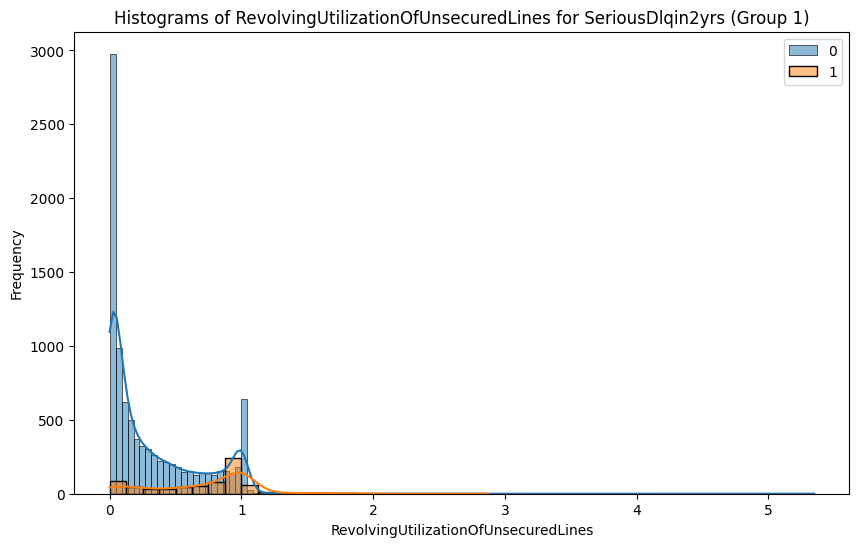

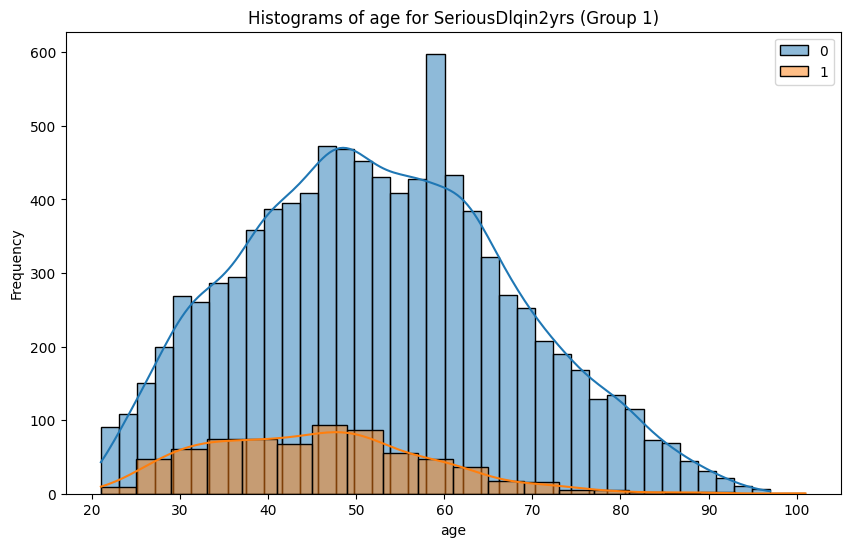

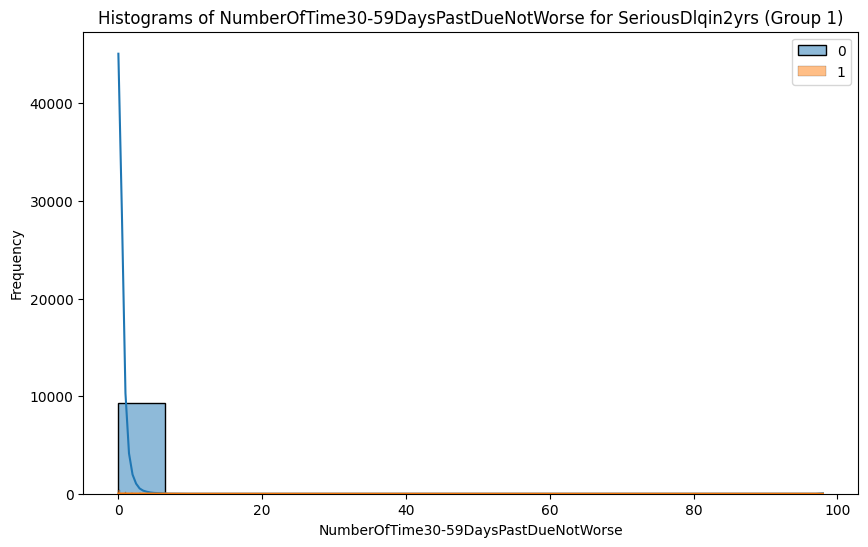

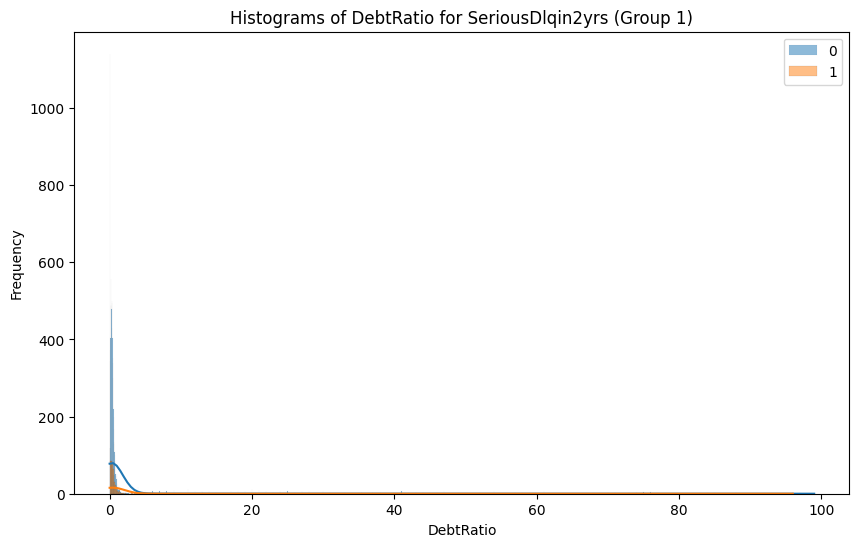

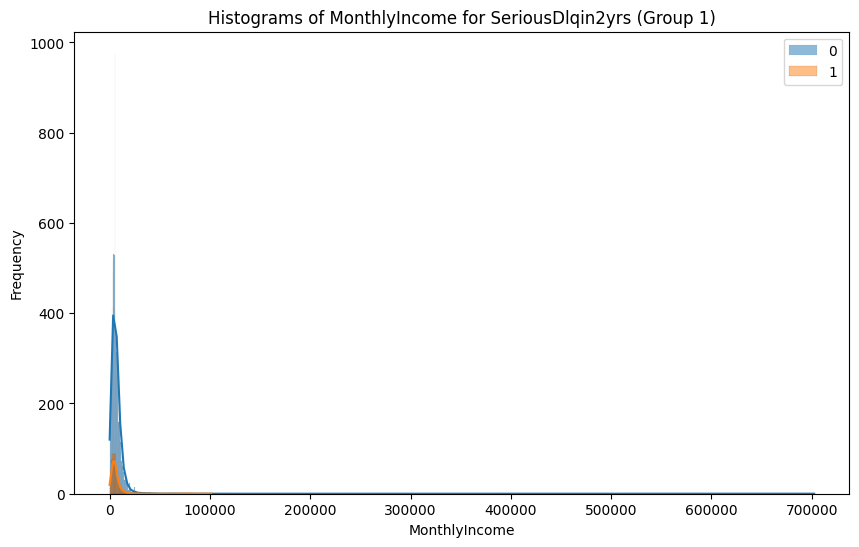

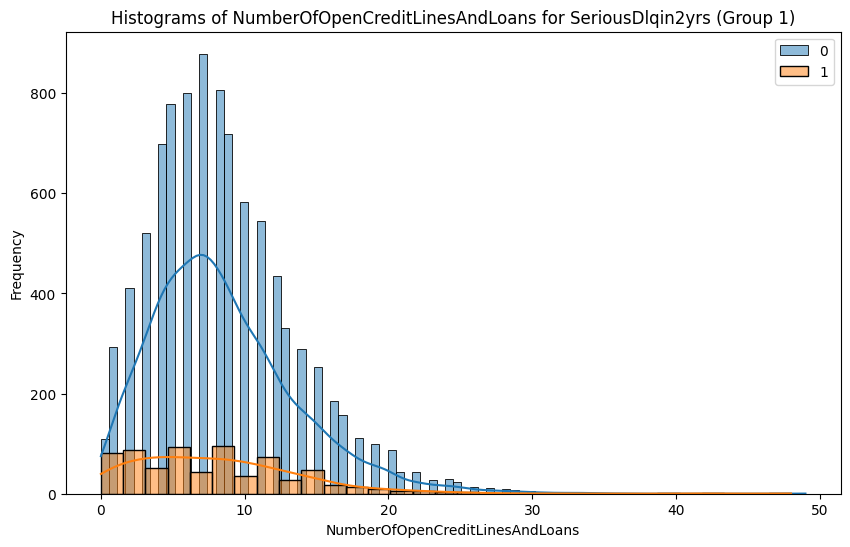

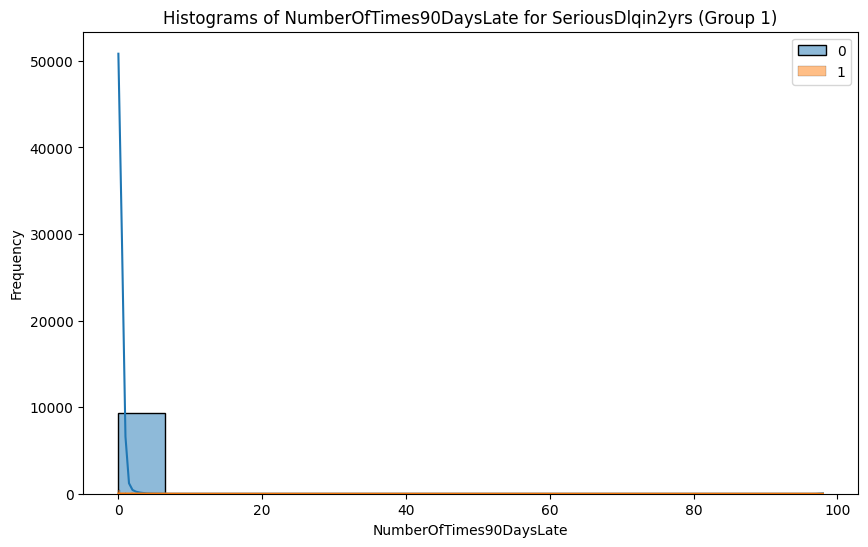

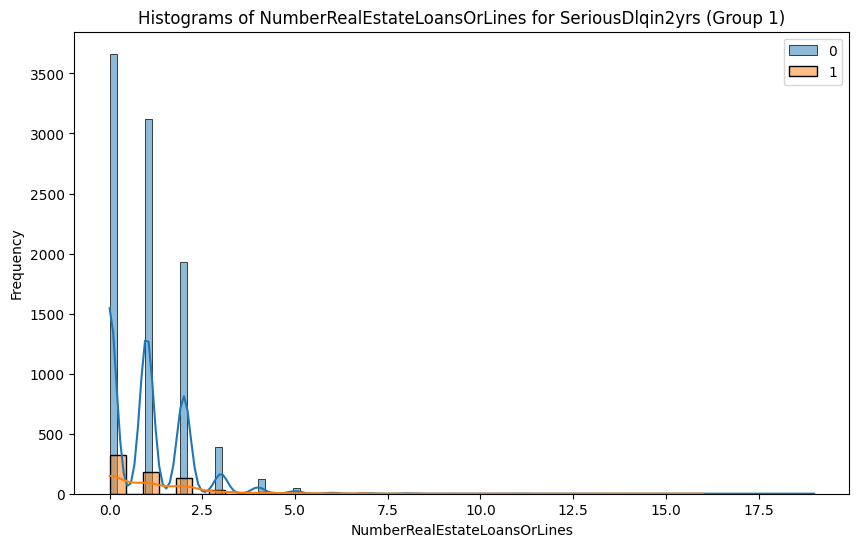

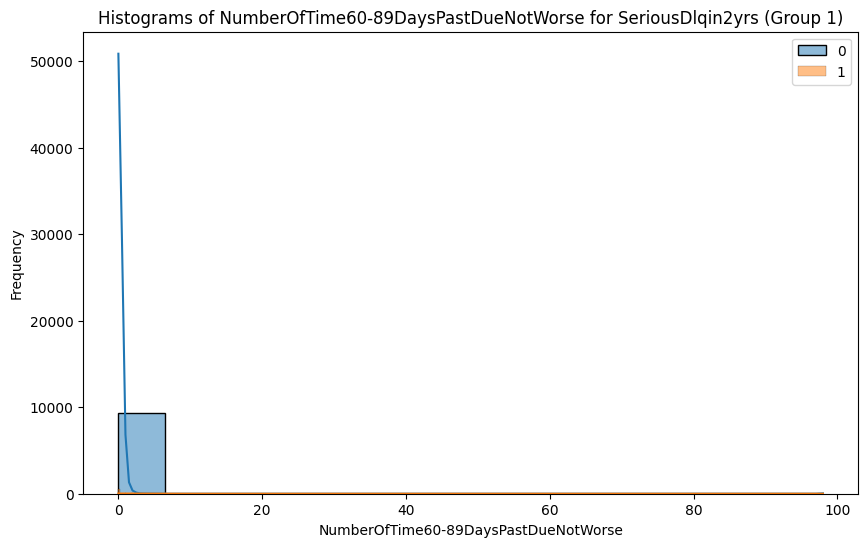

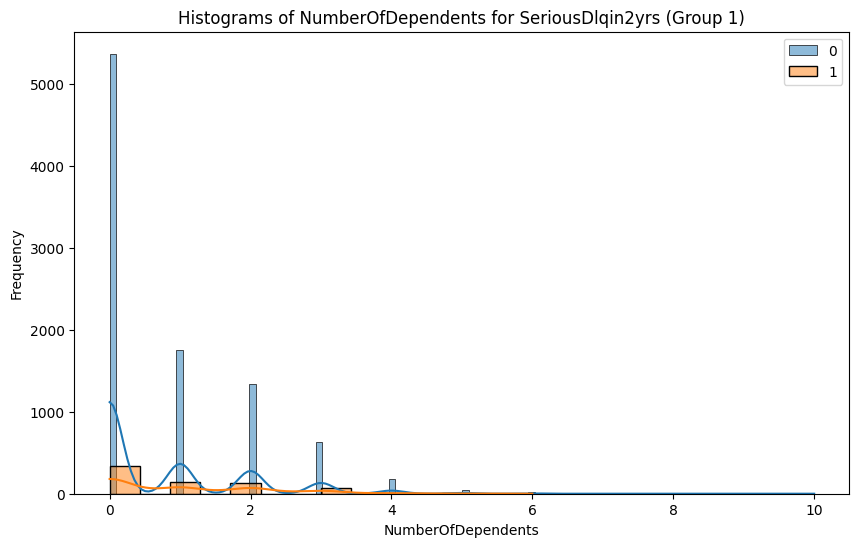

In [17]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

<Axes: >

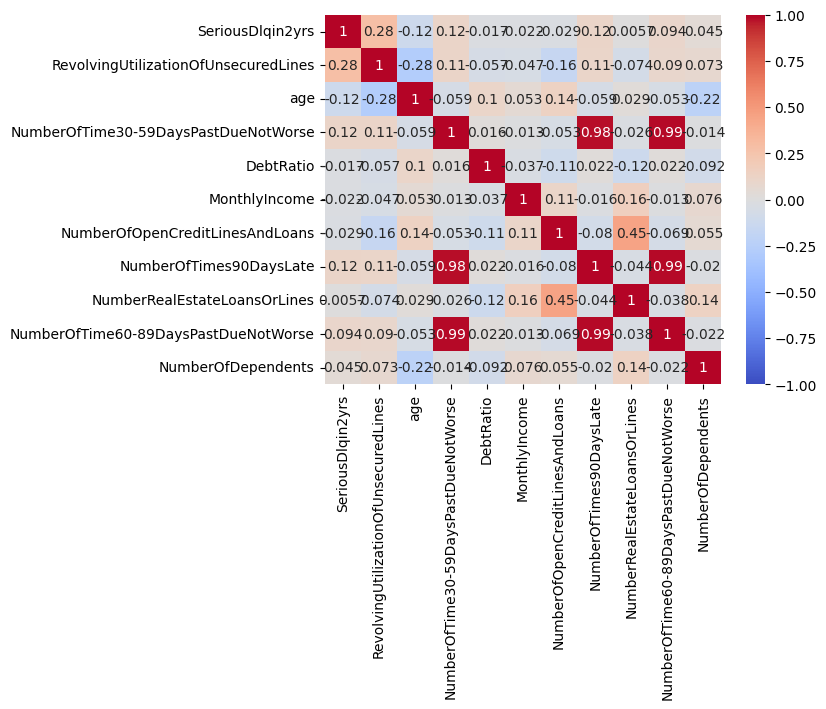

In [18]:
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin = -1, vmax = 1, cmap='coolwarm')

In [19]:
# 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse' y 'NumberOfTimes90DaysLate' presentas fuerte multicolinealidad
# Creo dos nuevas columnas, una con la suma y otra binaria
train_set_bck = train_set.copy()
test_set_bck = test_set.copy()

pagos_retrasados = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]

train_set["total_pagos_retrasados"] = train_set[pagos_retrasados].sum(axis = 1)
test_set["total_pagos_retrasados"] = test_set[pagos_retrasados].sum(axis = 1)

train_set["pagos_con_retraso"] = (train_set[pagos_retrasados].sum(axis = 1) > 0).astype(int)
test_set["pagos_con_retraso"] = (test_set[pagos_retrasados].sum(axis = 1) > 0).astype(int)

# Elimino las columnas menos una
train_set = train_set.drop(columns= pagos_retrasados, axis = 1)
test_set = test_set.drop(columns= pagos_retrasados, axis = 1)

In [20]:
features_num = [col for col in train_set.columns if (col != target and col != "pagos_con_retraso")]

features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 'total_pagos_retrasados']

In [21]:
features = features_num + ["pagos_con_retraso"]
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 'total_pagos_retrasados',
 'pagos_con_retraso']

### #1.7. Tratamiento

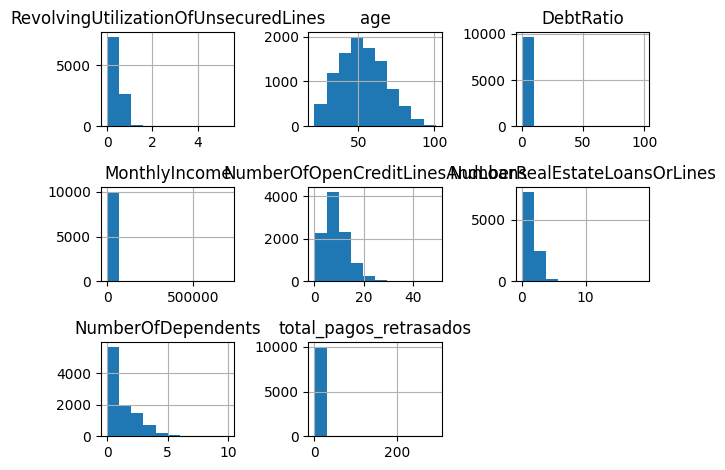

In [22]:
train_set[features_num].hist()
plt.tight_layout()

In [23]:
train_set_transformado = train_set.copy()
test_set_transformado = test_set.copy()

In [24]:
 # Aplico transformación logarítmica a estas variables:
features_transform = ["RevolvingUtilizationOfUnsecuredLines","DebtRatio", "MonthlyIncome", "NumberRealEstateLoansOrLines", "NumberOfDependents",
                      "total_pagos_retrasados"]

for feature in features_transform:
    train_set_transformado[feature] = train_set_transformado[feature].apply(np.log1p)
    test_set_transformado[feature] = test_set_transformado[feature].apply(np.log1p)

In [25]:
# Escalado
scaler = StandardScaler()
train_set_transformado[features_num] = scaler.fit_transform(train_set_transformado[features_num])
test_set_transformado[features_num] = scaler.transform(test_set_transformado[features_num])

In [26]:
train_set_transformado[features_num].describe()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,total_pagos_retrasados
count,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04
mean,-2.267162e-17,1.494910e-16,2.338011e-17,-2.444284e-17,-4.746870e-17,-9.210346e-17,4.250929e-18,-3.542441e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.003950e+00,-2.058341e+00,-6.112301e-01,-9.915938e+00,-1.646656e+00,-1.098664e+00,-8.052190e-01,-4.269897e-01
25%,-8.838580e-01,-7.306653e-01,-4.104176e-01,-4.183764e-01,-6.758539e-01,-1.098664e+00,-8.052190e-01,-4.269897e-01
50%,-4.008018e-01,-6.682728e-02,-2.143705e-01,7.318521e-02,-9.337276e-02,2.663903e-01,-8.052190e-01,-4.269897e-01
75%,8.299153e-01,6.633945e-01,5.692164e-03,5.264632e-01,4.891083e-01,1.064896e+00,4.835638e-01,-4.269897e-01
max,6.318618e+00,3.252363e+00,6.323798e+00,5.726075e+00,7.867202e+00,4.801002e+00,3.653237e+00,1.113375e+01


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [27]:
X_train = train_set[features]
X_train_trans = train_set_transformado[features]
y_train = train_set[target]

X_test = test_set[features]
X_test_trans = test_set_transformado[features]
y_test = test_set[target]

In [45]:
# Regresión logística
lr_clf = LogisticRegression(class_weight = "balanced", max_iter = 10000)
print("Recall medio:", np.mean(cross_val_score(lr_clf, X_train_trans, y_train, cv = 5, scoring= "balanced_accuracy")))

Recall medio: 0.7721843052988158


In [34]:
# Sobremuestreo aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_trans, y_train)

In [35]:
y_train_smote.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [47]:
# Entrenar el modelo KNN con los datos sobremuestreados
knn_smote = KNeighborsClassifier(n_neighbors=5)
print("Recall medio:", np.mean(cross_val_score(knn_smote, X_train_smote, y_train_smote, cv = 5, scoring= "balanced_accuracy")))

Recall medio: 0.9011579010887651


In [48]:
# Random Forest
X_train_smote_2, y_train_smote_2 = smote.fit_resample(X_train, y_train)

rf_clf = RandomForestClassifier(max_depth= 5, random_state= 42)
print("Recall medio:", np.mean(cross_val_score(rf_clf, X_train_smote_2, y_train_smote_2, cv = 5, scoring= "balanced_accuracy")))

Recall medio: 0.8318526532359796


In [50]:
rf_clf.fit(X_train_smote_2, y_train_smote_2)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [51]:
# Feature importance
rf_clf.feature_importances_

array([0.41349292, 0.06352905, 0.01052675, 0.00794797, 0.00973233,
       0.01308603, 0.1663844 , 0.26492069, 0.05037985])

In [52]:
rf_clf.feature_names_in_

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents',
       'total_pagos_retrasados', 'pagos_con_retraso'], dtype=object)

In [53]:
pd.DataFrame({"features": rf_clf.feature_names_in_, "importance": rf_clf.feature_importances_}).sort_values("importance",ascending = False)

,features,importance
0,RevolvingUtilizationOfUnsecuredLines,0.413493
7,total_pagos_retrasados,0.264921
6,NumberOfDependents,0.166384
1,age,0.063529
8,pagos_con_retraso,0.050380
5,NumberRealEstateLoansOrLines,0.013086
2,DebtRatio,0.010527
4,NumberOfOpenCreditLinesAndLoans,0.009732
3,MonthlyIncome,0.007948


El mejor Recall medio es el del modelo KNN.

In [55]:
knn_smote.fit(X_train_smote, y_train_smote)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [56]:
param_grid = {
    "n_neighbors": [3, 5, 7, 10],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn_clf = KNeighborsClassifier()

knn_grid = GridSearchCV(knn_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs= -1)

knn_grid.fit(X_train_smote,y_train_smote)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidat

In [58]:
knn_best = knn_grid.best_estimator_
knn_best

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'manhattan'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [61]:
best_params = knn_grid.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [60]:
knn_grid.best_score_

0.9261899548574893

In [64]:
# Entreno con los mejores hiperparámetros
knn_optimized_model = KNeighborsClassifier(**best_params)
knn_optimized_model.fit(X_train_smote, y_train_smote)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'manhattan'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [67]:
y_pred =  knn_optimized_model.predict(X_test_trans)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2345
           1       0.19      0.42      0.26       163

    accuracy                           0.84      2508
   macro avg       0.57      0.65      0.59      2508
weighted avg       0.91      0.84      0.87      2508



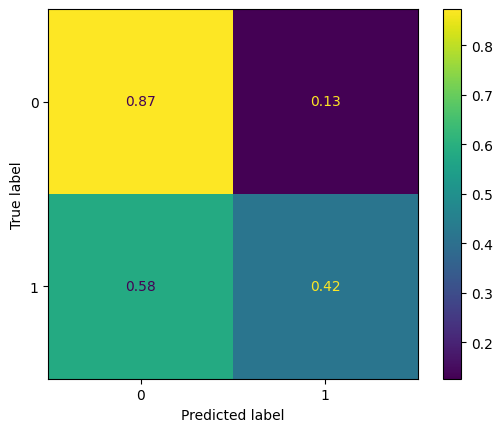

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize= "true")

El modelo solo identifica bien el 42% de los que tendrán deudas pendientes dentro de dos años. Predice los que no tienen deudas, predice mal un 13%.